## AIMS-CAMERO0N 2022 - 2023

## BIG DATA

## TOPIC : Data Gathering UN-job-list

## GROUP 6 
### LECTURER : DUNSTAN MATEKENYA


### Presented by : 
<ol>
  <li>Ben</li>
    <li>Gabelle</li>
    <li>Jane</li>
    <li>Leonard</li>
    <li>Lucien</li>
    <li>Mustapha</li>
  <li>Ahmed</li>
</ol>

# IMPORTATION
we import necessary packages/libraries.

In [1]:

import pandas as pd                 #for dataframe
import re                           #for string manipulation
from bs4 import BeautifulSoup       #for string scraping
from urllib.request import urlopen  #for string url


import email, smtplib, ssl          #for sending email
from email import encoders
from email.mime.base import MIMEBase
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText

import time                           #for date
from datetime import datetime, timedelta

import seaborn as sn                  #for plot
import matplotlib as plt

# Soup Objects creation


In [2]:
def Soup_function(url_main,list_job):
    ''' take  the main url and a list of job list_job like a parameters
         and return the liste of BeautifulSoup object
    '''
    #list of responce object
    responses = []
    
    #loop to created list object  responses
    for i in list_job:
        responses.append(urlopen(url_main+''+i))
    Soup_list = []
    #loop to created list object BeautifulSoup 
    for i in range(len(responses)):
        Soup_list.append(BeautifulSoup(responses[i], 'lxml'))
    return Soup_list

## Extracting Information Using the Soup Objects


In [3]:
def headers(soup=None):
    ''' take a  soup object in parameter and return
    the header of the table'''
    # Get Table headers using 'th' HTML tag
    headers_with_tags = soup.find_all('th')

    # Convert to string
    headers_str = str(headers_with_tags)

    # Extract text only and leave out HTML tags
    headers_without_tags = BeautifulSoup(headers_str, "lxml").get_text()
    headers_without_tags2 = headers_without_tags[1:-1]

    # Split using comma delimeter and remove any trailing spaces
    split_header = headers_without_tags2.split(',')
    split_header2 = [i.strip() for i in split_header] 
    return split_header2

In [4]:
def links(soup=None):
    ''' take a  soup object in parameter and return
    the link in the table of the table'''
    # Extract all hyperlinks
    soup.find_all('a')

    # the find all method returns a list
    all_links = soup.find_all("href")

    #list link
    all_list =[]
    # Loop through the list to retrieve required attributes from the hyperlinks
    for link in soup.find_all('a'):
        all_list.append(link.get("href"))
   
    #list link of description jobs
    all_list_descriptions = []
    
    # Loop through the list to retrieve required attributes from the hyperlinks of description
    for elt in all_list:
        if str(elt).find('https://unjoblist.org/r/?') == 0:
            all_list_descriptions.append(elt)
        
    return all_list_descriptions

In [5]:
def genered_body(soup=None):
    ''' take a  soup object in parameter and return
    the link in the table of the table'''
    rows = soup.find_all('td')  # A list of table rows
    j = 0
    list_tr = []          # A list of table tr
    list_td =[]           # A list of table td

    #loop to get the rows and clean the html 
    for i in range(len(rows)):
        #we move all the <> elt
        text = re.sub(re.compile('<.*?>'), '',str(rows[j]))
        list_td.append(text.strip())
        j = j + 1
        if j%6== 0 :
            list_tr.append(list_td)
            list_td =[] 
    return list_tr

In [6]:
def gemered_dataframe(soup=None):
    ''' take a  soup object in parameter and return
    dataframe'''
    df = pd.DataFrame(genered_body(soup))
    df.columns= headers(soup)
    df['Descriptions'] = links(soup)
    return df

### EVERY THINGS  TOGETHER


In [8]:
#list of jobs
jobs = ['statistician','data','research+officer']

#reacher link of job
url = 'https://unjoblist.org/results.php?kw='

## Save AS CSV into data folder
out_file = 'un_job_list_output.csv'

#job object list
soups = Soup_function(url,jobs)

#genered the dataset
df_final = pd.concat([gemered_dataframe(soups[0]),gemered_dataframe(soups[1]),gemered_dataframe(soups[2])])

# The index = False option ensures we dont save the default index
df_final.to_csv(out_file, index=False)

In [9]:
df_final.head()

,Organisation,Duty Station,Level,Post Title,Closing Date,Posting Retrieved,Descriptions
0,UN ESCWA,BEIRUT,P-3,"Statistician - Economic, Social and Developme...",2023-02-18,2023-01-21,https://unjoblist.org/r/?450604
1,UNCTAD,GENEVA,P-2,ASSOCIATE STATISTICIAN (Temporary Job Opening)...,2023-02-22,2023-02-16,https://unjoblist.org/r/?451985
2,UN DESA,NEW YORK,P-3,"Statistician [Temporary] - Economic, Social a...",2023-02-23,2023-02-12,https://unjoblist.org/r/?451753
3,UNECA,ADDIS ABABA,P-3,"Statistician (2 positions) - Economic, Social...",2023-03-16,2023-02-01,https://unjoblist.org/r/?451178
0,WHO,South Sudan-Juba,,Health Service Functionality project Data Liai...,2023-01-25,2023-01-18,https://unjoblist.org/r/?450407


### SEND THE EMAIL

In [10]:
subject = "An email with attachment from Python"
body = "This is an email with attachment sent from Python"
sender_email = "sanyaleonard07@gmail.com"
#receiver_email = "leonard.sanya@aims-cameroon.org"
def send_mail(n):
    try:
    # Create a multipart message and set headers
        message = MIMEMultipart()
        message["From"] = sender_email
        message["To"] = receiver_email
        message["Subject"] = subject
        # Add body to email
        message.attach(MIMEText(body, "plain"))
        filename = "output.csv"  # In same directory as script
        # Open PDF file in binary mode
        with open(filename, "rb") as attachment:
            # Add file as application/octet-stream
            # Email client can usually download this automatically as attachment
            part = MIMEBase("application", "octet-stream")
            part.set_payload(attachment.read())

        # Encode file in ASCII characters to send by email    
        encoders.encode_base64(part)

        # Add header as key/value pair to attachment part
        part.add_header(
            "Content-Disposition",
            f"attachment; filename= {filename}",
        )
        # Add attachment to message and convert message to string
        message.attach(part)
        text = message.as_string()

        # Log in to server using secure context and send email
        context = ssl.create_default_context()
        with smtplib.SMTP_SSL("smtp.gmail.com", 465, context=context) as server:
            server.login(sender_email, password)
            server.sendmail(sender_email, receiver_email, text)
    except:
        return("Mail not sent")

In [11]:
lists=['leonard.sanya@aims-cameroon.org','gabelle.dallous@aims-cameroon.org',
      'ulrich.djifuck@aims-cameroon.org','ben.gourion@aims-cameroon.org',
       "jane.wanjohi@aims-cameroon.org"]
password = input("Type your password and press enter: this ngggugouzqrumqsw")
for i in lists:
    receiver_email= i
    send_mail(receiver_email)

Type your password and press enter: this ngggugouzqrumqswngggugouzqrumqsw


### BREF ANALYSE OF THE DATAFRAME 

In [12]:
df_final.shape

(175, 7)

##### CONVERT THE CLOSING AND POSTING DATE INTO DATE SHAPE

In [13]:
df_final["Closing Date"]=pd.to_datetime(df_final["Closing Date"])
df_final["Posting Retrieved"]=pd.to_datetime(df_final["Posting Retrieved"]) 

#### CREATE A NEW VARIABLE TO CALCULATE THE OPENING TIME FOR EACH JOB (per days)

In [14]:
df_final['diff_days'] = (df_final['Closing Date'] - df_final['Posting Retrieved']).dt.days 
df_final.head()

,Organisation,Duty Station,Level,Post Title,Closing Date,Posting Retrieved,Descriptions,diff_days
0,UN ESCWA,BEIRUT,P-3,"Statistician - Economic, Social and Developme...",2023-02-18,2023-01-21,https://unjoblist.org/r/?450604,28
1,UNCTAD,GENEVA,P-2,ASSOCIATE STATISTICIAN (Temporary Job Opening)...,2023-02-22,2023-02-16,https://unjoblist.org/r/?451985,6
2,UN DESA,NEW YORK,P-3,"Statistician [Temporary] - Economic, Social a...",2023-02-23,2023-02-12,https://unjoblist.org/r/?451753,11
3,UNECA,ADDIS ABABA,P-3,"Statistician (2 positions) - Economic, Social...",2023-03-16,2023-02-01,https://unjoblist.org/r/?451178,43
0,WHO,South Sudan-Juba,,Health Service Functionality project Data Liai...,2023-01-25,2023-01-18,https://unjoblist.org/r/?450407,7


In [15]:
#We can claculate how many jobs a certain orgnizaton has posted which related to datascience

In [16]:
df_final[df_final['Organisation']=='UNCTAD'].shape #orgnization with name UNCTAD

(5, 8)

In [17]:
df_final[df_final["Level"]=="P-3"].shape # for level of jobs, the jobs required 6 years and above are 40

(40, 8)

In [18]:
df_final[df_final["Duty Station"]=="NEW YORK"].shape #how many jobs thet available in new york

(18, 8)

In [19]:
df_final['diff_days'].mean() # the average time available for each jobs in days

18.76

In [20]:
### also there is way that we can find a job with more that month as a duration
#and at the same time from WHO orgnization. 
df_final[(df_final['diff_days'] >=30) & (df_final["Organisation"]=="WHO")]

,Organisation,Duty Station,Level,Post Title,Closing Date,Posting Retrieved,Descriptions,diff_days
18,WHO,Anywhere,,Consultant - GIS Data Management,2023-03-12,2023-02-10,https://unjoblist.org/r/?451669,30


So we have one avialable job in WHO with exatly one month open.

#### Visuliazation

For example if we want to know how the distribution for time availabe for each jobs

C:\Users\T470S\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


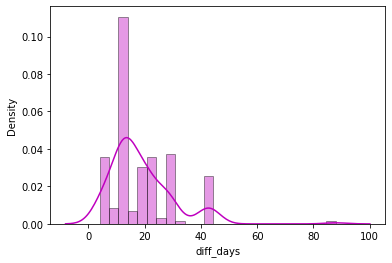

In [20]:
x = df_final['diff_days']
ax = sn.distplot(x, hist=True, kde=True, rug=False, color='m', bins=25, hist_kws={'edgecolor':'black'})
#plt.figure()

There is some jobs with long opening time and some of them with short time, so it depends on the job itself and the location

C:\Users\T470S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='diff_days'>

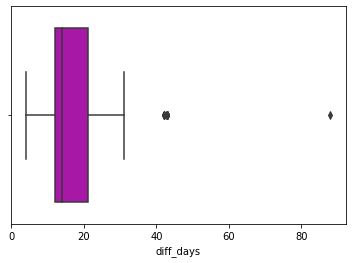

In [21]:
sn.boxplot(x, color='m')
#plt.show()

Some outlires from the boxplot which confirm the previous explanation.

### REFERENCES

<ol>
<li>https://realpython.com/python-send-email/#:~:text=Use%20Python's%20built%2Din%20smtplib,a%20few%20lines%20of%20code</li>
<li>https://beautiful-soup-4.readthedocs.io/en/latest/</li>
<li>https://www.datacamp.com/tutorial/tutorial-python-beautifulsoup-datacamp-tutorials</li>

</ol>